# Project: NO Show Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>**Brief** :This report is based on the analysis of 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up
for their appointment. A number of characteristics about the patient are
included in each row and will be cleaned and arranged to draw a prediction.


In [9]:
#import statements for all packages needed .
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import time
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [10]:
# Load and inspect data
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
df.shape

(110527, 14)

In [44]:
no_show_percentage = 22319/110527
print(no_show_percentage * 100)

20.193255946510806


In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning 

In [14]:
df.drop(['AppointmentDay','ScheduledDay','PatientId','AppointmentID' ], axis = 1 , inplace=True )
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
df.rename(columns={'Hipertension' : 'Hypertension'} , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.rename(columns={'No-show' : 'No_show'} , inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


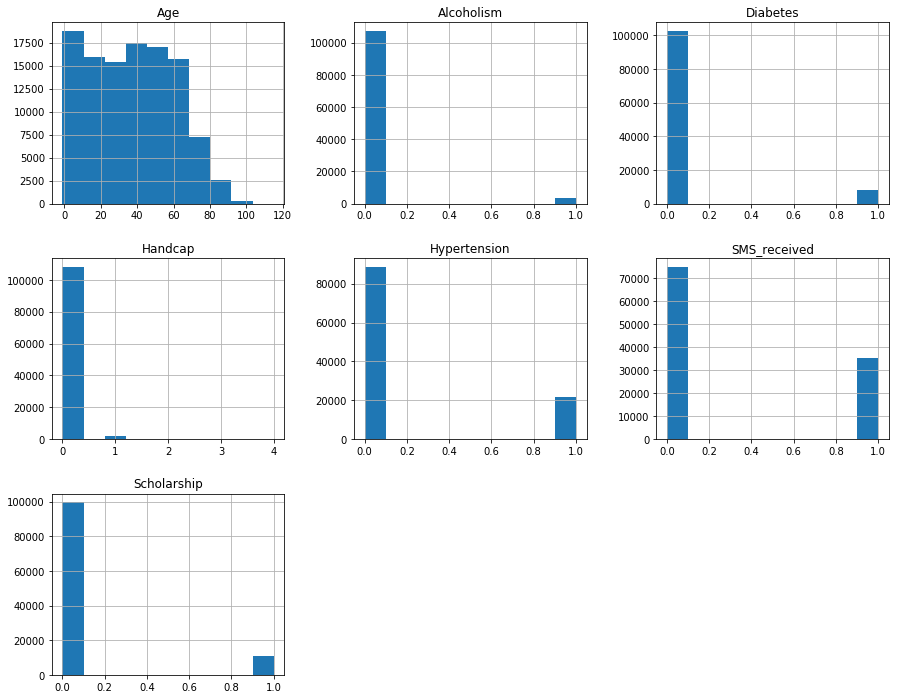

In [17]:
df.hist(figsize=(15,12));

In [18]:
#Number of Showed up vs. no shows 
Show = df.No_show == 'No'
Noshow = df.No_show == 'Yes'

In [20]:
df[Show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No_show          88208
dtype: int64

In [21]:
df[Noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Question 1 - Testing Age variable !

In [23]:
#the mean age for patient who showed up
df.Age[Show].mean()

37.790064393252315

In [24]:
#the mean age for patient who didn't show up
df.Age[Noshow].mean()

34.317666562121957

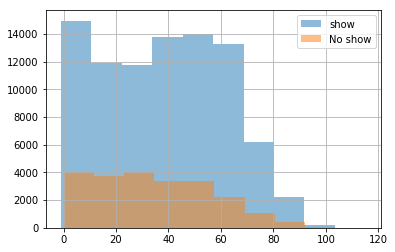

In [25]:
# graph the age mean for both showed up and no show together
df.Age[Show].hist(alpha = 0.5, label = 'show')
df.Age[Noshow].hist(alpha = 0.5, label = 'No show')
plt.legend();

Age Factor and showing up are significantly correlated as patients from age 0 to 10 are more likely to show up for their appointments!

### Question 2  Testing Gender Variable!

In [30]:
# Showed up vs. No show based on Gender!
print(df.Gender[Show].value_counts())
print(df.Gender[Noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


In [35]:
# Show vs. No show comparison based on Gender!
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

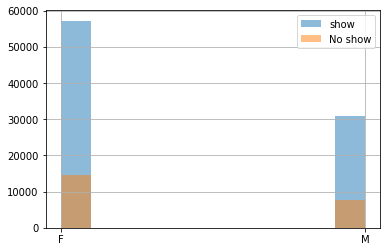

In [36]:
# graph the Gender mean for both showed up and no show together
df.Gender[Show].hist(alpha = 0.5, label = 'show')
df.Gender[Noshow].hist(alpha = 0.5, label = 'No show')
plt.legend();

Gender Factor is insignificant as females are showing up and not showing up at the same time more than men do!

# Question 3: Testing SMS variable?

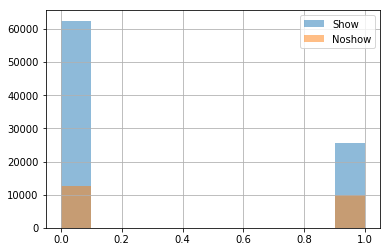

In [43]:
#receiving SMS vs. showing up/not showing up!
df.SMS_received[Show].hist(alpha = 0.5, label = 'Show')
df.SMS_received[Noshow].hist(alpha = 0.5, label = 'Noshow')
plt.legend();

Receiving a SMS factor is quite insignificant as patients who recived SMS and didn't show up are more than patients who didn't recieve a SMS at all which is bit confusing!

# Question 4 : Testing Location variable?

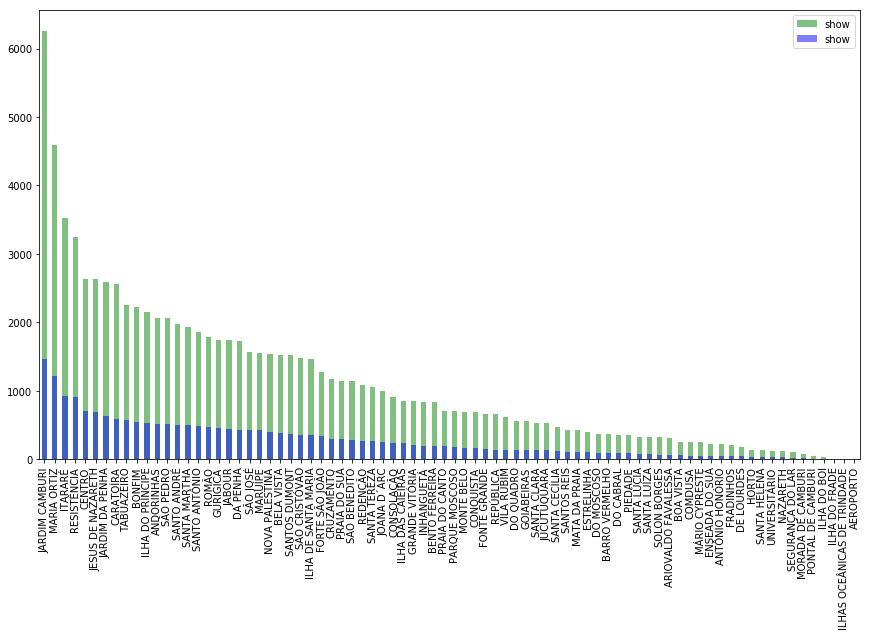

In [58]:
# neighborhoods that have the highest number of show up vs. no show 
plt.figure(figsize=[14.70,8.27])
df.Neighbourhood[Show].value_counts().plot(kind = 'bar', alpha=0.5 , color='green', label='show')
df.Neighbourhood[Noshow].value_counts().plot(kind = 'bar', alpha=0.5 , color='blue', label='show')
plt.legend()

Jardim Camburi is neighborhood that has the highest number of showed up patients still it also has the highest no-show patients comparing to other neighborhoods

<a id='conclusions'></a>
## Conclusions
-Age is Signifcant factor specially with younger patients (0-10).
-Percentage of showed up to no-show is 80-20% which is considered moderate to high.
-Location can be an effective factor.

Limitations:
-There were some data such as patients with age -1 or less which does not make sense.
-Couldn't draw clear correlation between Geneder , Receiving a SMS with showing up or not.

Findings:
- Average age of Showed up patients is 37 years, and the average age for non showed up patients is 34 years.
- female patients show up / do not show to their appointment more than male patients.
- Jardim Camburi is neighborhood that has the highest number of showed up patients still it also has the highest no-show patients comparing to other neighborhoods

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'No Show Analysis .ipynb'])

0